# Cryptocurrency Market Analysis

In this project, we will analyze data from Yahoo Finance of three popular cryptocurrencies to date.

We will use Pandas to extract and analyze the information and visualize it.
Some of the questions that are answered in this analysis are:

- What was the change of price over time?
- What was the daily return on average of a stock?
- What was the moving average of various stock?
- What is the correlation between daily returns of different stock?

In [1]:
#python data analysis imports
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

#visualization imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

#grab data imports
import pandas_datareader.data as pdr
from datetime import datetime

In [2]:
#We are going to analyze the top cryptocurrencies.
cc_list = ['BTC-USD','ETH-USD','LTC-USD']

In [3]:
#Setting the end date to today
end = datetime.today()

#Start date set to one year back
start = datetime(end.year-1,end.month,end.day)

In [4]:
#using yahoo finance to grab cryptocurrency data
BTC = pdr.DataReader('BTC-USD','yahoo',start,end)
ETH = pdr.DataReader('ETH-USD','yahoo',start,end)
LTC = pdr.DataReader('LTC-USD','yahoo',start,end)

In [5]:
#STATISTICS FOR BTC'S STOCK
BTC.describe()

,High,Low,Open,Close,Volume,Adj Close
count,366.000000,366.000000,366.000000,366.000000,3.660000e+02,366.000000
mean,8943.407333,8611.018483,8780.200728,8783.192490,2.727992e+10,8783.192490
std,1380.581124,1398.289824,1387.540626,1393.711590,1.162718e+10,1393.711590
min,5331.833984,4106.980957,5002.578125,4970.788086,1.144536e+10,4970.788086
25%,7800.332642,7517.305298,7652.531738,7652.029297,1.759791e+10,7652.029297
50%,9167.738281,8799.275391,8934.328613,8935.923340,2.401870e+10,8935.923340
75%,9780.087891,9469.027832,9641.094482,9644.885010,3.519219e+10,9644.885010
max,12359.056641,11954.525391,12251.895508,12254.402344,7.415677e+10,12254.402344


In [6]:
#STATISTICS FOR ETH'S STOCK
ETH.describe()

,High,Low,Open,Close,Volume,Adj Close
count,366.000000,366.000000,366.000000,366.000000,3.660000e+02,366.000000
mean,207.451670,196.986400,202.156365,202.742153,1.161597e+10,202.742153
std,65.049319,61.645765,63.065145,63.990474,5.297085e+09,63.990474
min,116.021622,95.184303,110.406784,110.605873,5.109033e+09,110.605873
25%,170.039001,159.451256,165.363899,165.315296,7.473294e+09,165.315296
50%,190.659981,182.615273,186.901611,186.867523,9.877174e+09,186.867523
75%,234.132187,224.830601,229.127163,229.272743,1.469463e+10,229.272743
max,444.577759,429.874603,437.562988,437.397827,2.808919e+10,437.397827


In [7]:
#STATISTICS FOR LTC'S STOCK
LTC.describe()

,High,Low,Open,Close,Volume,Adj Close
count,366.000000,366.000000,366.000000,366.000000,3.660000e+02,366.000000
mean,54.116730,51.197537,52.714785,52.684248,3.283060e+09,52.684248
std,11.686007,10.939179,11.369943,11.324663,1.194481e+09,11.324663
min,34.139050,25.573105,31.004513,30.930883,1.122905e+09,30.930883
25%,44.322728,42.597990,43.604620,43.574136,2.489816e+09,43.574136
50%,49.902967,47.090664,48.674358,48.716909,3.062246e+09,48.716909
75%,61.771808,57.831506,59.704064,59.716275,3.978088e+09,59.716275
max,83.689163,79.428391,83.025452,82.990349,7.552238e+09,82.990349


# What is the change in stock's price over time?

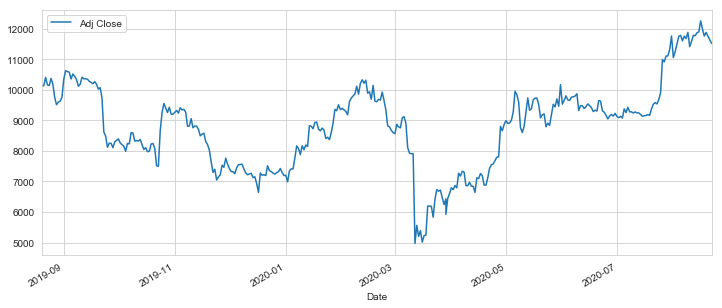

In [8]:
#Using pandas we canplot the stocks adjusted closing price
BTC['Adj Close'].plot(legend = True, figsize=(12,5))

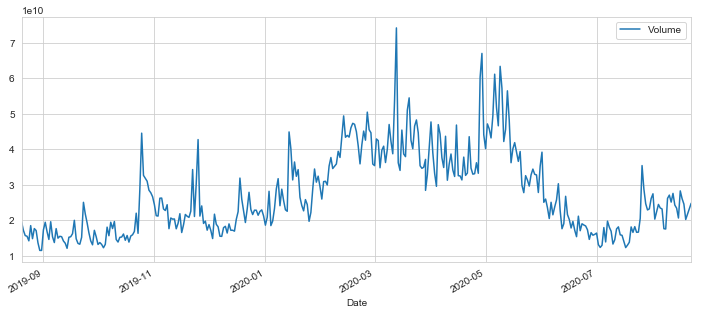

In [9]:
#Using pandas once more to plot the total volume being traded over time
BTC['Volume'].plot(legend=True,figsize=(12,5))

# What was the moving average of the stocks?

In [10]:
#using pandas we will create moving averages for 10, 20 and 50 day periods of time

ma_days = [10,20,50]

for ma in ma_days:
    column_name = "MA %s days" %(str(ma))
    BTC[column_name] = BTC['Adj Close'].rolling(window=ma,center=False).mean()

In [11]:
BTC.tail()

,High,Low,Open,Close,Volume,Adj Close,MA 10 days,MA 20 days,MA 50 days
Date,,,,,,,,,
2020-08-16,12359.056641,11806.696289,11895.658203,12254.402344,2.822769e+10,12254.402344,11786.926953,11575.253271,10236.328301
2020-08-17,12335.707031,11954.525391,12251.895508,11991.233398,2.604323e+10,11991.233398,11810.645703,11629.173779,10293.281328
2020-08-18,12028.923828,11687.333008,11990.884766,11758.283203,2.450285e+10,11758.283203,11818.900098,11662.064551,10344.629902
2020-08-19,11900.411133,11710.063477,11761.500000,11878.372070,2.017524e+10,11878.372070,11818.926172,11700.422461,10399.437480
2020-08-22,11601.118164,11448.805664,11575.694336,11519.162109,2.474664e+10,11519.162109,11829.789844,11710.207227,10445.254219


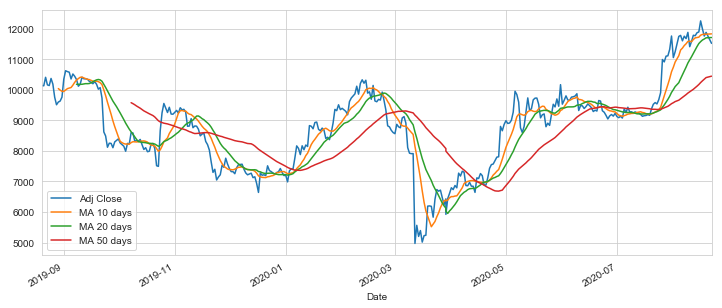

In [12]:
BTC[['Adj Close','MA 10 days','MA 20 days','MA 50 days']].plot(legend=True,figsize=(12,5))

# What was the daily return average of a stock?

In [14]:
#In order calculate daily return we can use the percentage change of the adjusted closing price

BTC['Daily Return'] = BTC['Adj Close'].pct_change()

BTC['Daily Return'].tail()

Date
2020-08-16    0.030405
2020-08-17   -0.021475
2020-08-18   -0.019427
2020-08-19    0.010213
2020-08-22   -0.030241
Name: Daily Return, dtype: float64

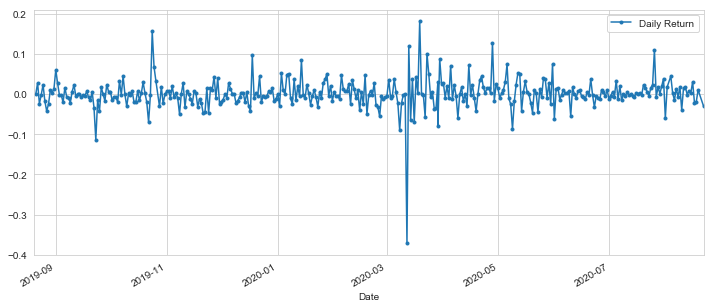

In [15]:
#Let us now plot the daily return
BTC['Daily Return'].plot(marker='.',legend=True,figsize=(12,5))

# What was the correlation between daily returns of different stocks?

In [16]:
#Let's read the 'Adj Close' column from all the cryptocurrencies giants

close_df = pdr.DataReader(cc_list,'yahoo',start,end)['Adj Close']

In [17]:
close_df.tail()

Symbols,BTC-USD,ETH-USD,LTC-USD
Date,,,
2020-08-16,12254.402344,429.531250,67.028038
2020-08-17,11991.233398,423.669312,65.527534
2020-08-18,11758.283203,406.463776,62.004627
2020-08-19,11878.372070,416.439789,62.966755
2020-08-22,11510.234375,387.562195,59.082676


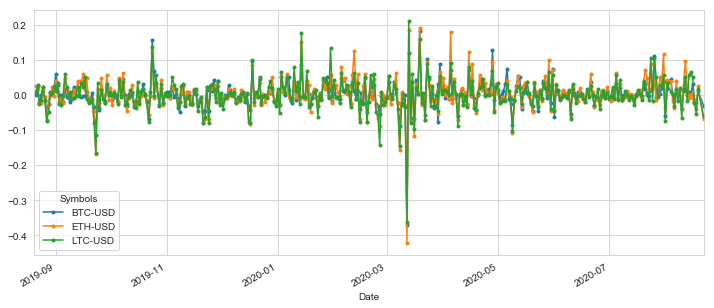

In [18]:
#Let's explore the returns again using the percentage change from the adj close.
returns_df = close_df.pct_change()
returns_df.plot(marker='.',legend=True,figsize=(12,5))

This plot is hard to understand, let's use a jointplot instead. 

In [19]:
returns_df.tail()

Symbols,BTC-USD,ETH-USD,LTC-USD
Date,,,
2020-08-16,0.030405,-0.009810,0.050159
2020-08-17,-0.021475,-0.013647,-0.022386
2020-08-18,-0.019427,-0.040611,-0.053762
2020-08-19,0.010213,0.024543,0.015517
2020-08-22,-0.030992,-0.069344,-0.061685


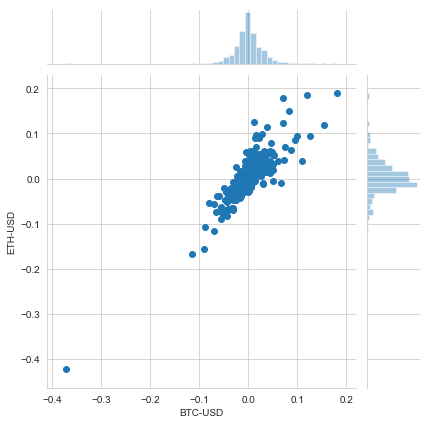

In [20]:
#We can now try to find the correlation between Bitcoin and Ethreum
sns.jointplot('BTC-USD','ETH-USD',returns_df,kind='scatter')

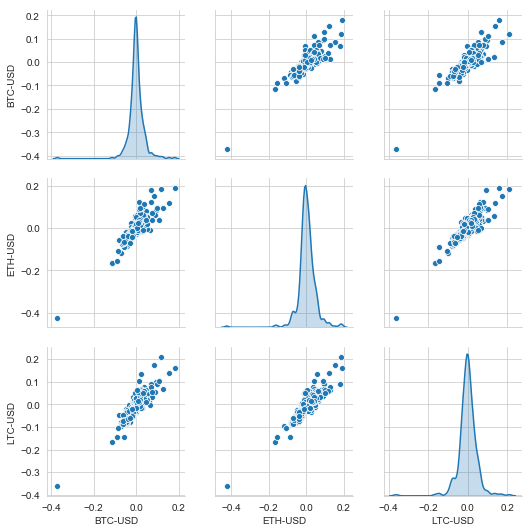

In [21]:
sns.pairplot(returns_df.dropna(),diag_kind='kde')

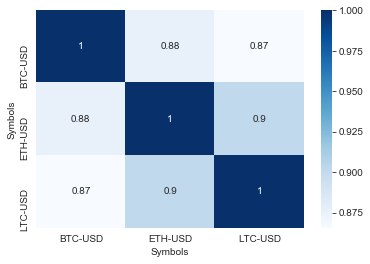

In [22]:
corr = returns_df.dropna().corr()

sns.heatmap(corr,
            xticklabels=corr.columns,
            yticklabels=corr.columns, 
            annot=True,
            cmap='Blues')

#the darker the shade the higher the correlation